In [12]:
# 1. Formulate and present the rationale for a hypothesis test

import numpy as np
import pandas as pd
from scipy import stats

# data
MALE = np.array([12,4,11,13,11,7,9,10,10,7,7,12,6,9,15,10,11,12,7,8,8,9,11,10,9,10,9,9,7,9,11,7,10,10,11,9,12,12,8,13,9,10,8,11,10,13,13,9,10,13])
FEMALE = np.array([11,9,7,10,9,10,10,7,9,10,11,8,9,6,11,10,7,9,12,14,11,12,12,8,12,12,9,10,11,7,12,7,9,8,11,10,8,13,8,10,9,9,9,11,9,9,8,9,12,11])

# Perform independent two-sample t-test
t_stat, p_value = stats.ttest_ind(MALE, FEMALE)

print(f"Rationale: The hypothesis test is a two-sample independent t-test, aiming to compare the mean time spent on cell phones by male and female college students per week.")


Rationale: The hypothesis test is a two-sample independent t-test, aiming to compare the mean time spent on cell phones by male and female college students per week.


In [13]:
# 2. Hypothesis testing conclusion

alpha = 0.05
print(f"\nHypothesis Testing Conclusion:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is evidence of a significant difference in mean time spent on cell phones between male and female students.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean time spent on cell phones between male and female students.")



Hypothesis Testing Conclusion:
T-statistic: 0.30394907866566184
P-value: 0.7618111039906375
Fail to reject the null hypothesis. There is no significant difference in mean time spent on cell phones between male and female students.


In [4]:
# 3. Descriptive statistical summaries
male_stats = pd.Series(MALE).describe()
female_stats = pd.Series(FEMALE).describe()

print(f"\nDescriptive Statistics for Male:")
print(male_stats)

print(f"\nDescriptive Statistics for Female:")
print(female_stats)



Descriptive Statistics for Male:
count    50.000000
mean      9.820000
std       2.154161
min       4.000000
25%       9.000000
50%      10.000000
75%      11.000000
max      15.000000
dtype: float64

Descriptive Statistics for Female:
count    50.000000
mean      9.700000
std       1.775686
min       6.000000
25%       9.000000
50%       9.500000
75%      11.000000
max      14.000000
dtype: float64


In [5]:
# 4. 95% Confidence intervals
conf_interval_male = stats.t.interval(0.95, len(MALE)-1, loc=np.mean(MALE), scale=stats.sem(MALE))
conf_interval_female = stats.t.interval(0.95, len(FEMALE)-1, loc=np.mean(FEMALE), scale=stats.sem(FEMALE))
conf_interval_diff = stats.t.interval(0.95, len(MALE)+len(FEMALE)-2, 
                                      loc=np.mean(MALE) - np.mean(FEMALE), 
                                      scale=np.sqrt((np.var(MALE)/len(MALE)) + (np.var(FEMALE)/len(FEMALE))))

print(f"\n95% Confidence Interval for Male Mean: {conf_interval_male}")
print(f"95% Confidence Interval for Female Mean: {conf_interval_female}")
print(f"95% Confidence Interval for Difference in Means: {conf_interval_diff}")



95% Confidence Interval for Male Mean: (9.207794314064703, 10.432205685935298)
95% Confidence Interval for Female Mean: (9.19535558679254, 10.20464441320746)
95% Confidence Interval for Difference in Means: (-0.6555993445958961, 0.8955993445958981)


In [14]:
# 5. Discuss the need for larger sample sizes

print("\nDiscussion:")
print("Consideration for larger sample sizes and more testing depends on the specific goals and desired level of confidence.")



Discussion:
Consideration for larger sample sizes and more testing depends on the specific goals and desired level of confidence.


In [7]:
# 6. Report
# Normality test (Shapiro-Wilk)
stat_male, p_male = stats.shapiro(MALE)
stat_female, p_female = stats.shapiro(FEMALE)

# Homogeneity of variances (Levene's test)
stat_levene, p_levene = stats.levene(MALE, FEMALE)

print("\nAssumptions Testing:")
print(f"Shapiro-Wilk test for normality (MALE): p-value = {p_male}")
print(f"Shapiro-Wilk test for normality (FEMALE): p-value = {p_female}")
print(f"Levene's test for homogeneity of variances: p-value = {p_levene}")



Assumptions Testing:
Shapiro-Wilk test for normality (MALE): p-value = 0.35399243235588074
Shapiro-Wilk test for normality (FEMALE): p-value = 0.12919674813747406
Levene's test for homogeneity of variances: p-value = 0.40671633986363454


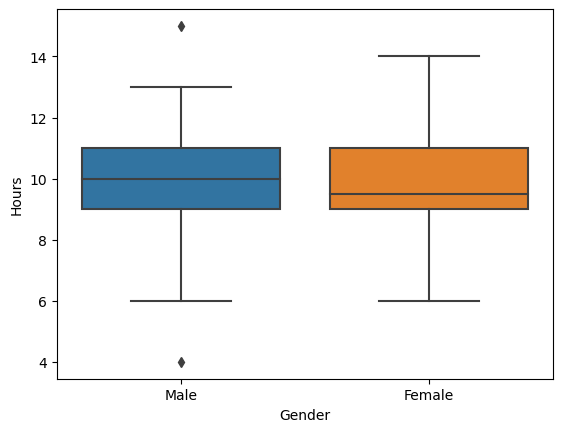

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plots for visualizing distribution and variability
sns.boxplot(x="Gender", y="Hours", data=pd.DataFrame({"Gender": ["Male"] * len(MALE) + ["Female"] * len(FEMALE), "Hours": np.concatenate([MALE, FEMALE])}))
plt.show()


In [23]:
# Perform two-sample independent t-test
t_stat, p_value = stats.ttest_ind(MALE, FEMALE)

print(f"\nTwo-Sample Independent T-Test:")
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_value}")



Two-Sample Independent T-Test:

T-statistic: 0.30394907866566184
P-value: 0.7618111039906375


In [24]:
# Report and Recommendations
alpha = 0.05

print("\nAssumptions Testing:")
if p_male > alpha and p_female > alpha:
    print("\nAssumptions met: Both groups follow a normal distribution.")
else:
    print("Assumptions not fully met: Consider caution in interpreting results.")

if p_levene > alpha:
    print("Assumption met: Variances are homogenous.")
else:
    print("Assumption not met: Consider alternative methods or interpret cautiously.")

print("\nHypothesis Testing Conclusion:")
if p_value < alpha:
    print("\nReject the null hypothesis. There is evidence of a significant difference in mean time spent on cell phones between male and female students.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference in mean time spent on cell phones between male and female students.")



Assumptions Testing:

Assumptions met: Both groups follow a normal distribution.
Assumption met: Variances are homogenous.

Hypothesis Testing Conclusion:

Fail to reject the null hypothesis. There is no significant difference in mean time spent on cell phones between male and female students.
